# This Notebook is made for PointSSIM-Viz of GeoDecepticon

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PointSSIM import *

## Get the data

training data shape:  (6000, 64, 64)
test data shape:  (3000, 64, 64)


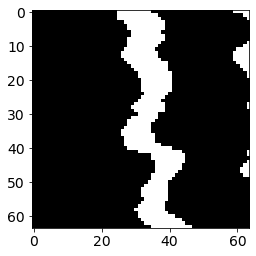

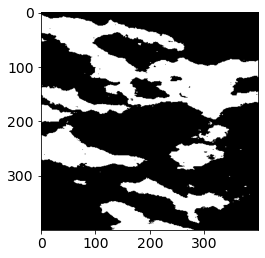

In [29]:
data_1 = np.load("/Users/oscaro/Library/CloudStorage/OneDrive-NTNU/GeoDecepticon/data_array_1.npz")
data_2 = np.load("/Users/oscaro/Library/CloudStorage/OneDrive-NTNU/GeoDecepticon/data_array_1.npz")
data_3 = np.load("/Users/oscaro/Library/CloudStorage/OneDrive-NTNU/GeoDecepticon/data_array_1.npz")

data_array_1 = data_1['data_array']
data_array_2 = data_2['data_array']
data_array_3 = data_3['data_array']

training_data = np.concatenate((data_array_1, data_array_2), axis=0)
test_data = data_array_3
print("training data shape: ", training_data.shape)
print("test data shape: ", test_data.shape)

plt.imshow(training_data[0],cmap='gray')
plt.show()

MPS_data = np.load("/Users/oscaro/Library/CloudStorage/OneDrive-NTNU/PhD/Paper_3/Anchors/Data/ragnar_data.npy")
plt.imshow(MPS_data[0],cmap='gray')
plt.show()

## Compute the Marked Point-Process and Plot

In [30]:
# Let the color be determined by the label of the anchor point
base_size = training_data[0].shape[0]
all_anchors_array = []
for i in range(len(training_data)):
    all_anchors_array.append(custom_anchors(training_data[i], base_size,True))  # Updated custom_anchors function
anchors_MPS = []
for i in range(len(MPS_data)):
    anchors_MPS.append(custom_anchors(MPS_data[i], MPS_data[0].shape[0],True))  # Updated custom_anchors function

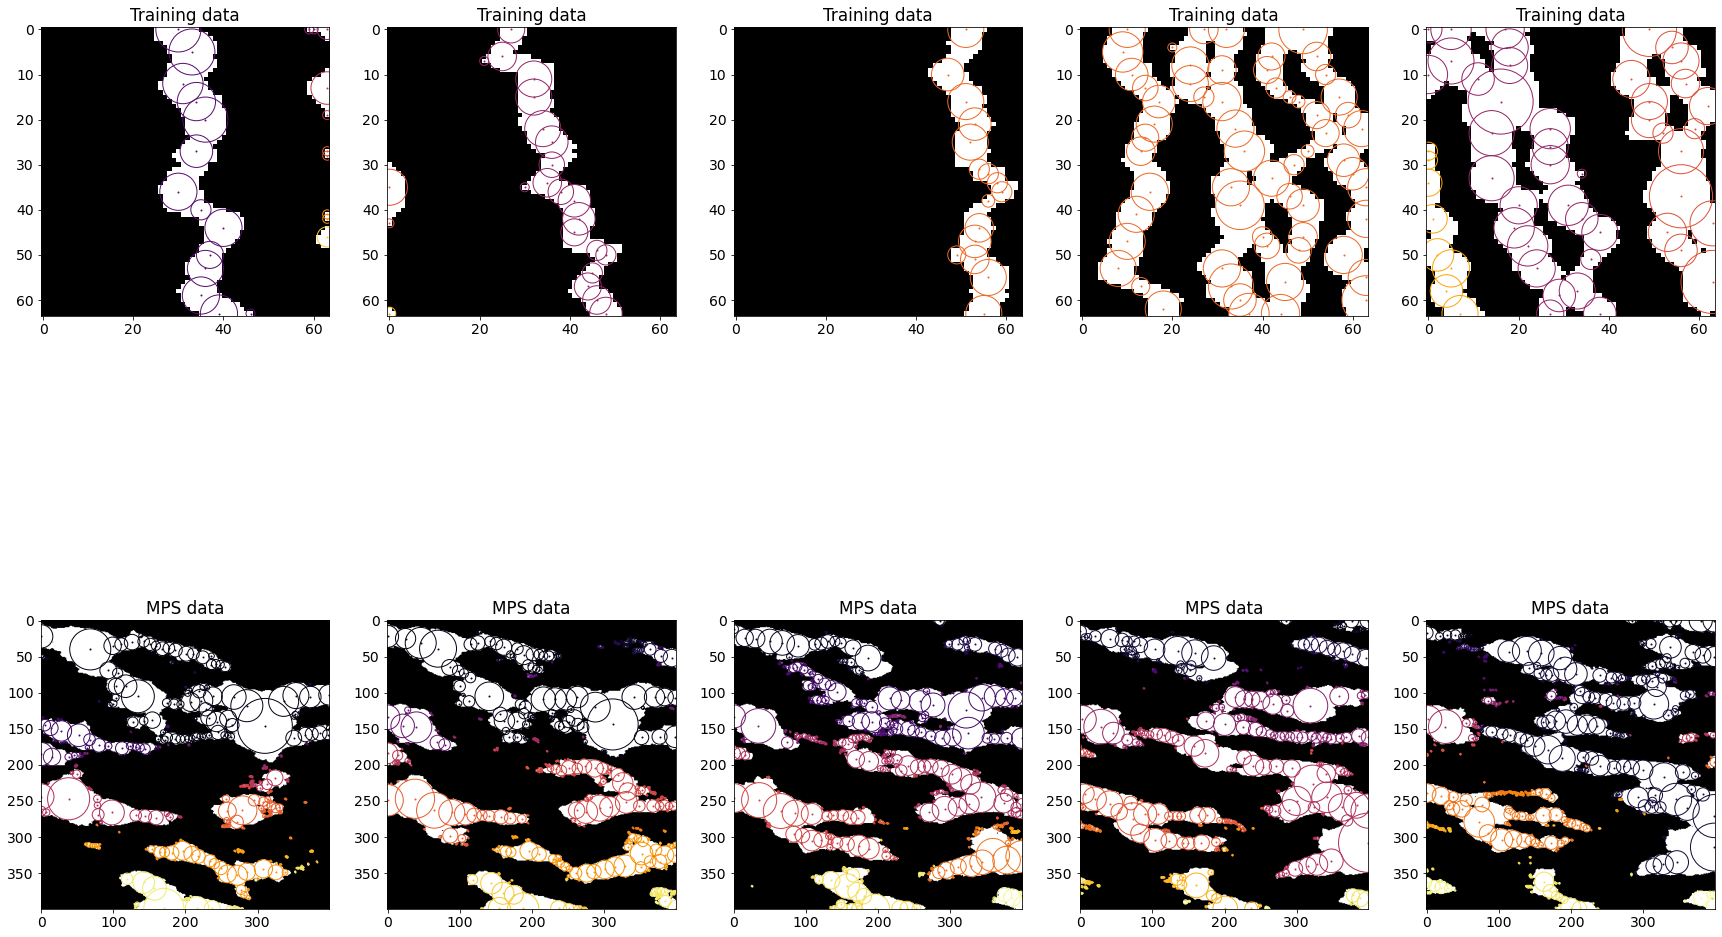

In [32]:
fig, ax = plt.subplots(2, 5, figsize=(30, 20))
for i in range(5):
    nr_anchor_points = np.sum(all_anchors_array[i][0])
    nr_anchor_points_MPS = np.sum(anchors_MPS[i][0])
    ax[0,i].imshow(training_data[i], cmap='gray')
    ax[0,i].set_title('Training data')
    ax[1,i].imshow(MPS_data[i], cmap='gray')
    ax[1,i].set_title('MPS data')
    colors = sns.color_palette('inferno', int(np.max(all_anchors_array[i][2])) + 1)
    for k in range(int(nr_anchor_points)):
        x, y = np.where(all_anchors_array[i][0])[0][k], np.where(all_anchors_array[i][0])[1][k]
        r = all_anchors_array[i][1][x, y]
        ax[0,i].plot(y, x, 'o', markersize=1, color=colors[int(all_anchors_array[i][2][x, y])])
        circle = plt.Circle((y, x), r, color=colors[int(all_anchors_array[i][2][x, y])], fill=False)
        ax[0,i].add_artist(circle)
    colors = sns.color_palette('inferno', int(np.max(anchors_MPS[i][2])) + 1)
    for k in range(int(nr_anchor_points_MPS)):
        x, y = np.where(anchors_MPS[i][0])[0][k], np.where(anchors_MPS[i][0])[1][k]
        r = anchors_MPS[i][1][x, y]
        ax[1,i].plot(y, x, 'o', markersize=1, color=colors[int(anchors_MPS[i][2][x, y])])
        circle = plt.Circle((y, x), r, color=colors[int(anchors_MPS[i][2][x, y])], fill=False)
        ax[1,i].add_artist(circle)
plt.show()

# Compute the Feature Vectors & Plot

In [33]:
feature_vecs = []
for i in range(len(training_data)):
    feature_vecs.append(feature_vector(training_data[i], base_size))
feature_vecs_MPS = []
for i in range(len(MPS_data)):
    feature_vecs_MPS.append(feature_vector(MPS_data[i], MPS_data[0].shape[0]))

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.ticker import FormatStrFormatter

def plotting_vecs(all_vecs, labels, datanames, some_colors, subplot_dim):
    # Set font size for all text in the plots
    plt.rcParams.update({'font.size': 14})
    
    fig, axes = plt.subplots(subplot_dim, subplot_dim, figsize=(40, 40))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    
    # Plot the data in matrix form
    for i in range(subplot_dim):
        for j in range(subplot_dim):
            if i == j:
                for k in range(len(all_vecs)):
                    axes[i, j].hist(np.array(all_vecs[k])[:,i], label=datanames[k], color=some_colors[k], alpha=0.5)
            else:
                for k in range(len(all_vecs)):
                    axes[i, j].scatter(np.array(all_vecs[k])[:,j], np.array(all_vecs[k])[:,i], label=datanames[k], color=some_colors[k], alpha=0.5)
                    # Set ticks to have only 3 decimal places
                    axes[i, j].xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
            if i == 3:
                axes[i, j].set_xlabel(labels[j],fontsize=30)
            if j == 0:
                axes[i, j].set_ylabel(labels[i],fontsize=30)

    # Set tick parameters
    axes[i, j].tick_params(axis='both', which='major', labelsize=20)

    # Create a new figure for the legend
    fig_legend, ax_legend = plt.subplots(figsize=(10, 2))  # Adjust the figure size to accommodate the horizontal legend

    # Create legend handles manually
    handles = [mpatches.Patch(color=some_colors[i], label=datanames[i]) for i in range(len(datanames))]

    # Add the legend to the subplot
    ax_legend.legend(handles=handles, loc='center', ncol=len(handles))

    # Hide the axes
    ax_legend.axis('off')
    # Show the plots
    plt.show()

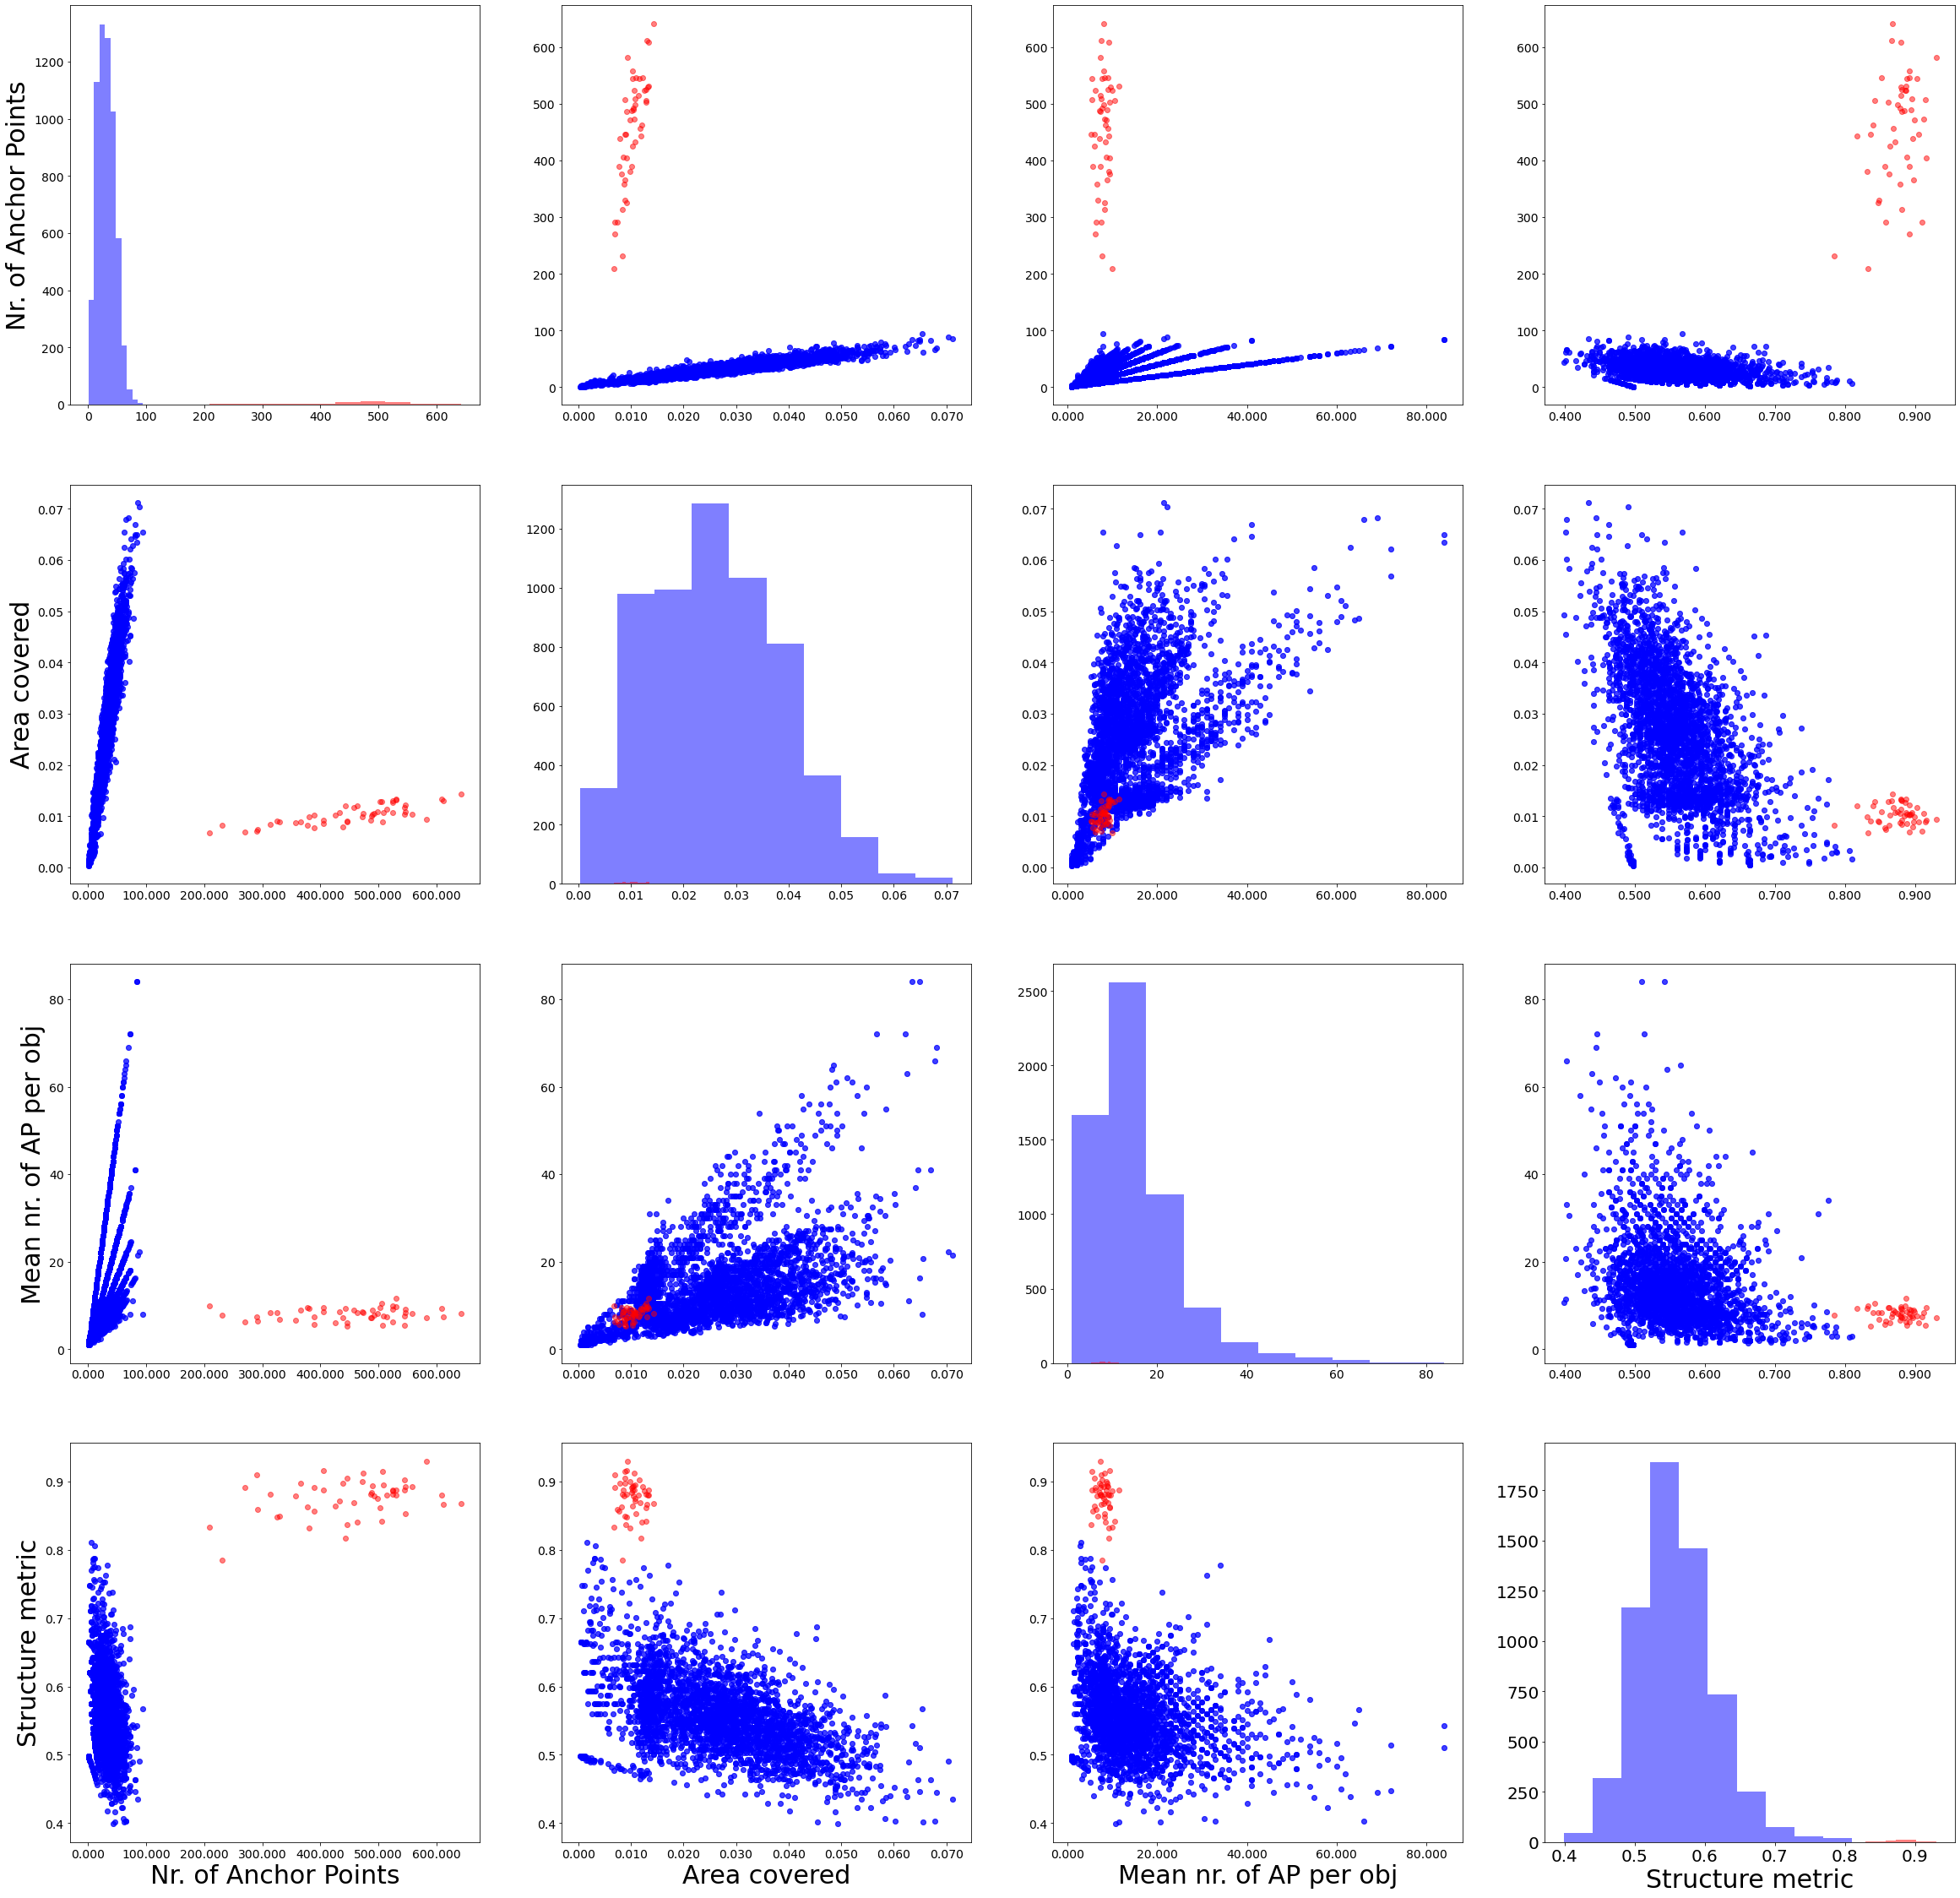

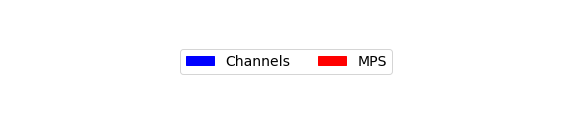

In [35]:
labels = ['Nr. of Anchor Points', 'Area covered', 'Mean nr. of AP per obj', 'Structure metric']
datanames = ['Channels', 'MPS']
some_colors = ['blue', 'red', 'green', 'purple', 'orange', 'yellow', 'black', 'pink']
subplot_dim = 4
feature_vecs_list = [feature_vecs, feature_vecs_MPS]
plotting_vecs(feature_vecs_list,labels,datanames,some_colors,subplot_dim)

In [37]:
import pandas as pd
df = pd.DataFrame(feature_vecs, columns=labels)
df['type'] = 'Channels'
df_MPS = pd.DataFrame(feature_vecs_MPS, columns=labels)
df_MPS['type'] = 'MPS'
df_all = pd.concat([df, df_MPS])

In [38]:
import plotly.express as px
fig = px.scatter_3d(df_all, x=labels[0], y=labels[2], z=labels[3],
                    color=labels[1], symbol='type')
fig.show()